In [31]:
# Exploration
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [32]:
train = pd.read_csv('./Data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
print("Total of entries: {0}".format(len(train)))
train.isnull().sum().sort_values(ascending=False)

Total of entries: 891


Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

# Data Exploration

## Plotting Data

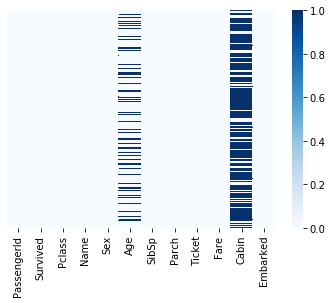

In [35]:
#Plot missing values of columns from training data
sns.heatmap(train.isnull(), yticklabels=False, cmap='Blues')
plt.show()

As we can see from the heatmap, there are three columns have missing value: **Cabin**, **Age**, **Embarked**. While **Embarked** column have only 2 missing values, **Cabin** have 687 missing values and (77.1%) **Age** columns have 177 missing values (19.7%). Although having many missing values, but we can still consider the posibility of filling these missing values of **Age** column with mean value or some other ways. Otherwise, we may need to remove **Cabin** columns from our training data due to there are over 50% missing values.

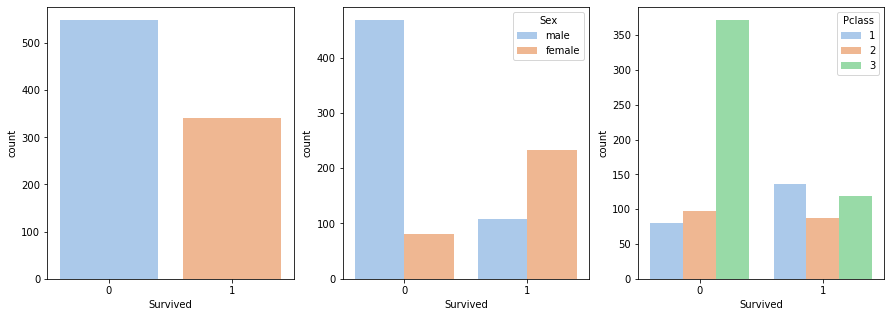

In [36]:
fig = plt.figure(figsize=(15,5))
#Plot survived data
ax1 = fig.add_subplot(1,3,1)
sns.countplot(x='Survived', data=train, palette='pastel', ax=ax1)
#Plot survived data with respect sex 
ax2= fig.add_subplot(1,3,2)
sns.countplot(x='Survived', hue='Sex', data=train, palette='pastel', ax=ax2)
#Plot survived data with respect Pclass (1: upper, 2:middle, 3:lower)
ax3 = fig.add_subplot(1,3,3)
sns.countplot(x='Survived', hue='Pclass', data=train, palette='pastel', ax=ax3)
plt.show()

We can easily realize that number of deaths is more than survived. men are die more than women, and there are also have some differences from the number of death with specific ticket class that is the lower the ticket class, the lower posibility to survive.

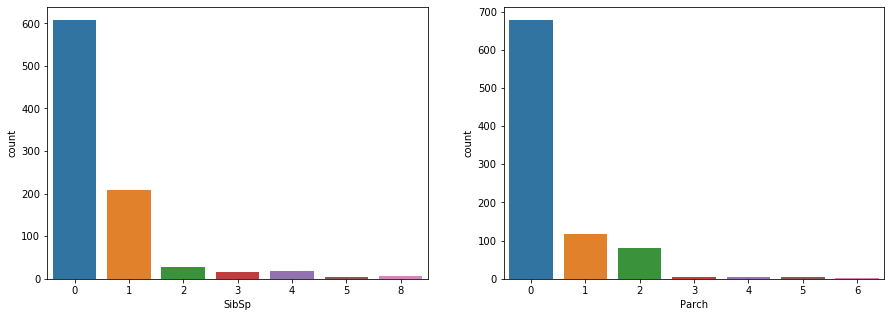

In [37]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
sns.countplot(x='SibSp', data=train, ax=ax1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x='Parch', data=train, ax=ax2)
plt.show()

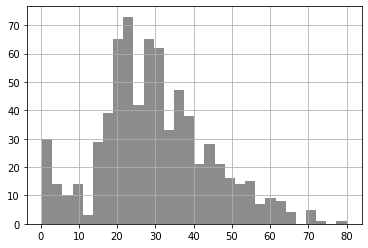

In [38]:
train['Age'].hist(bins=30, color='gray', alpha=0.9)

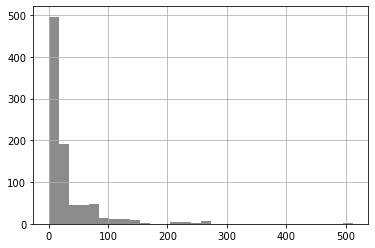

In [39]:
train['Fare'].hist(bins=30, color='gray', alpha=0.9)

Now we are going to handle missing values from **Age** columns. We can use information from other columns to fill missing values of this columns since we have already known that there are about **20%** missing value in **Age** columns, this is a reasonable missing value percent that we cant think about filling missing values. 
We may use many ways to fill missing values than just using mean to fill.

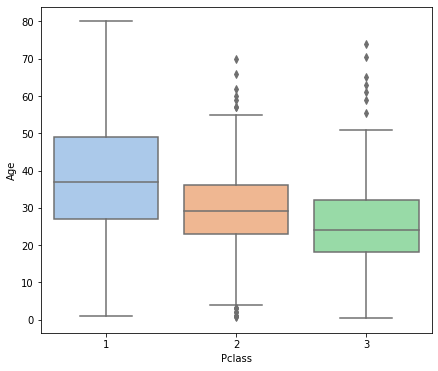

In [40]:
fig = plt.figure(figsize=(7,6))
sns.boxplot(x='Pclass', y='Age', data=train, palette='pastel')

## Data Cleaning

### Age column

In [41]:
train[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


We see that the more weathier the passenger, the more older they tend to be,which makes sense. Therefore we can use mean Age of each Pclass to fill.

In [42]:
def fill_age_with_pclass(cols):
    age = cols['Age']
    pclass = cols['Pclass']
    if pd.isnull(age):
        if pclass == 1:
            return "38"
        elif pclass == 2:
            return "30"
        else:
            return "25"
    else:
        return age 

In [43]:
train['Age'] = train.apply(fill_age_with_pclass, axis=1).astype('float32')
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 25.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 30.  , 31.  , 34.  , 15.  ,
       28.  ,  8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,
        7.  , 49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  ,
       32.  , 16.  ,  0.83, 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ], dtype=float32)

As we can see that **Age** column contains float values like ***28.5, 45.5, 34.5***, so we will get ceiling value of them, or we will set data type of this column from float to int. Also there are values which is less 1, but in fact there is no 0 age, so we will consider to delete row which contains 0 year old.

In [44]:
train['Age'] = np.ceil(train['Age'])
train = train[train['Age'] > 0]
train['Age'].unique()

array([22., 38., 26., 35., 25., 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 30., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,
        3.,  7., 49., 29., 65.,  5., 11., 45., 17., 32., 16.,  1., 33.,
       23., 24., 46., 59., 71., 37., 47., 12.,  9., 51., 56., 41., 44.,
       61., 50., 36., 62., 52., 63., 43., 60., 10., 64., 13., 48., 53.,
       57., 80., 70.,  6., 74.], dtype=float32)

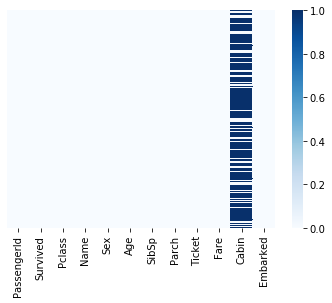

In [45]:
#Plot missing values of columns from training data
sns.heatmap(train.isnull(), yticklabels=False, cmap='Blues')
plt.show()

With heatmap above, we see that all missing values of **Age** were already filled. Now let's drop **Cabin** columns

### Cabin column

In [46]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We can see that cabin column contains value with pattern like ***cabin type + number of room***, therefore we can split the first letter of each value and separate them into cabin type. Also we can consider fill all empty values into a cabin type which is not duplicate with existing cabin types

In [47]:
def fill_cabin(df):
    cabin = df['Cabin']
    # fill empty value of cabin with Z
    cabin = cabin.apply(lambda x: 'Z' if pd.isna(x) else x)
    cabin_type = cabin.apply(lambda x: x[0:1])
    return cabin_type

In [48]:
train['Cabin_type'] = fill_cabin(train)
train['Cabin_type'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

We get 9 cabins type after splitting cabin column value into types, with **Z** is marked as missing values and the others are existing values

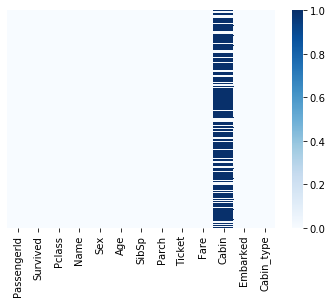

In [49]:
#Plot missing values of columns from training data
sns.heatmap(train.isnull(), yticklabels=False, cmap='Blues')
plt.show()

# Data preparation

While training works with numerical data better than string, then we need to transfrom columns which we need to numerical

In [50]:
sex = pd.get_dummies(train['Sex'], prefix="Sex")
embarked = pd.get_dummies(train['Embarked'], prefix='Embarked')
pclass = pd.get_dummies(train['Pclass'], prefix='Pclass')
cabin_type = pd.get_dummies(train['Cabin_type'], prefix='Cabin_type')
train = pd.concat([train, sex, embarked, pclass, cabin_type], axis=1)

In [51]:
def split_ticket():
    str_tickets = []
    num_tickets = []
    for row in ticket:
        str_ticket=''
        num_ticket=row
        if (' ' in row):
            str_ticket = row.split(' ')[0]
            num_ticket = row.split(' ')[1]
        str_tickets.append(str_ticket)
        num_tickets.append(num_ticket)
    return str_tickets, num_tickets

# ticket = train['Ticket'] 
# str_tickets, num_tickets = split_ticket()

# train["string_ticket"] = str_tickets
# train["number_ticket"] = num_tickets
# p3_ticket = train[['Pclass', 'string_ticket']][train['Pclass'] == 3]
# p2_ticket = train[['Pclass', 'string_ticket']][train['Pclass'] == 2]
# p1_ticket = train[['Pclass', 'string_ticket']][train['Pclass'] == 1]

# p3_ticket["string_ticket"].value_counts()

# p2_ticket["string_ticket"].value_counts()

# p1_ticket["string_ticket"].value_counts()

In [52]:
drop_cols = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked', 'Cabin_type']
train.drop(drop_cols, axis=1, inplace=True)

In [53]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   SibSp         891 non-null    int64  
 2   Parch         891 non-null    int64  
 3   Fare          891 non-null    float64
 4   Sex_female    891 non-null    uint8  
 5   Sex_male      891 non-null    uint8  
 6   Embarked_C    891 non-null    uint8  
 7   Embarked_Q    891 non-null    uint8  
 8   Embarked_S    891 non-null    uint8  
 9   Pclass_1      891 non-null    uint8  
 10  Pclass_2      891 non-null    uint8  
 11  Pclass_3      891 non-null    uint8  
 12  Cabin_type_A  891 non-null    uint8  
 13  Cabin_type_B  891 non-null    uint8  
 14  Cabin_type_C  891 non-null    uint8  
 15  Cabin_type_D  891 non-null    uint8  
 16  Cabin_type_E  891 non-null    uint8  
 17  Cabin_type_F  891 non-null    uint8  
 18  Cabin_type_G  891 non-null    

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,...,Pclass_3,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Z
0,0,1,0,7.2500,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,0,71.2833,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,53.1000,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


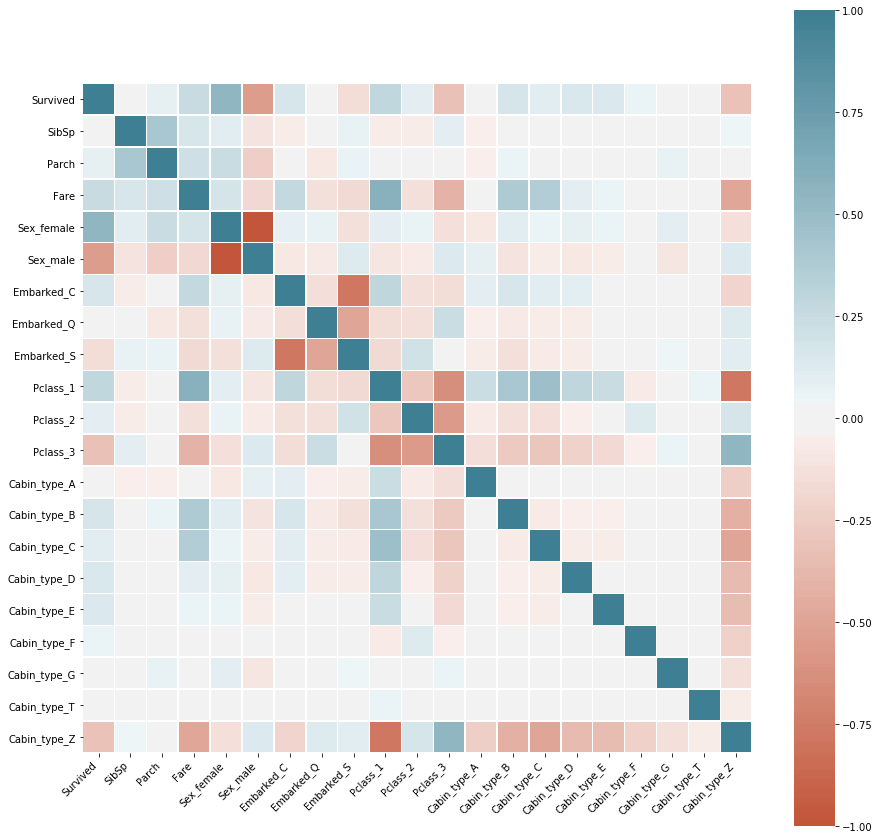

In [54]:
corr = train.corr()
fig = plt.figure(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, 
    vmax=1, 
    center=0,
    linewidths=0.5,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

Our data is ready, let's build a model

# Model Training 

## Split train test set

In [55]:
# Get feature columns
feature_cols = list(train.columns.drop('Survived'))
# Split train data into train set and test set
kf = KFold(n_splits=3, shuffle=True, random_state=100)
for train_index, test_index in kf.split(train):
    X_train, X_test = train[feature_cols].iloc[train_index], train[feature_cols].iloc[test_index]
    y_train, y_test = train['Survived'].iloc[train_index], train['Survived'].iloc[test_index]

## Traning & Predicting

In [56]:
def logistic_regression(X_train, y_train, X_test, max_iter=100):
    lr = LogisticRegression(max_iter=max_iter)
    lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    return lr, predictions

def decision_tree(X_train, y_train, X_test, max_depth=10):
    dt_class = DecisionTreeClassifier(max_depth=max_depth)
    dt_class.fit(X_train, y_train)
    predictions = dt_class.predict(X_test)
    return dt_class, predictions

def random_forest(X_train, y_train, X_test, max_depth=10):
    rf_class = RandomForestClassifier(max_depth=max_depth)
    rf_class.fit(X_train, y_train)
    predictions = rf_class.predict(X_test)
    return rf_class, predictions

In [57]:
# Logistic Regression
lr_model, lr_predictions = logistic_regression(X_train, y_train, X_test, 200)
# Decision Tree
dt_model, dt_predictions = decision_tree(X_train, y_train, X_test, 6)
# Random Forest
rf_model, rf_predictions = random_forest(X_train, y_train, X_test, 5)

In [58]:
# create statictics dataframe to compare accuracy and error of models
statictics_df = pd.DataFrame(columns=['model_name', 'accuracy', 'mean_square_error'])
# calculate mean square error
lr_mse = mean_squared_error(y_test, lr_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
# calculate accuracy
lr_acc = accuracy_score(y_test, lr_predictions)
dt_acc = accuracy_score(y_test, dt_predictions)
rf_acc = accuracy_score(y_test, rf_predictions)

In [59]:
statictics_df = statictics_df.append({'model_name' : 'Logistic Regression', 'accuracy': lr_acc, 'mean_square_error': lr_mse}, ignore_index=True)
statictics_df = statictics_df.append({'model_name' : 'Decision Tree', 'accuracy': dt_acc, 'mean_square_error': dt_mse}, ignore_index=True)
statictics_df = statictics_df.append({'model_name' : 'Random Forest', 'accuracy': rf_acc, 'mean_square_error': rf_mse}, ignore_index=True)

## Compare results of each model

In [60]:
statictics_df

,model_name,accuracy,mean_square_error
0,Logistic Regression,0.824916,0.175084
1,Decision Tree,0.794613,0.205387
2,Random Forest,0.818182,0.181818


# Predict with Test set

In [275]:
test = pd.read_csv('./Data/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [276]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [299]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [298]:
test['Cabin_type'] = fill_cabin(test)

In [305]:
test['Age'] = test[['Age','Pclass']].apply(fill_age_with_pclass,axis=1).astype('float32')
train['Age'] = np.ceil(train['Age'])
train = train[train['Age'] > 0]

In [307]:
sex = pd.get_dummies(test['Sex'], prefix="Sex")
embarked = pd.get_dummies(test['Embarked'], prefix='Embarked')
pclass = pd.get_dummies(test['Pclass'], prefix='Pclass')
cabin_type = pd.get_dummies(test['Cabin_type'], prefix='Cabin_type')
test = pd.concat([test, sex, embarked, pclass, cabin_type], axis=1)

passengerId = test['PassengerId']

In [308]:
test.drop(drop_cols, axis=1, inplace=True)

In [309]:
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SibSp         418 non-null    int64  
 1   Parch         418 non-null    int64  
 2   Fare          418 non-null    float64
 3   Sex_female    418 non-null    uint8  
 4   Sex_male      418 non-null    uint8  
 5   Embarked_C    418 non-null    uint8  
 6   Embarked_Q    418 non-null    uint8  
 7   Embarked_S    418 non-null    uint8  
 8   Pclass_1      418 non-null    uint8  
 9   Pclass_2      418 non-null    uint8  
 10  Pclass_3      418 non-null    uint8  
 11  Cabin_type_A  418 non-null    uint8  
 12  Cabin_type_B  418 non-null    uint8  
 13  Cabin_type_C  418 non-null    uint8  
 14  Cabin_type_D  418 non-null    uint8  
 15  Cabin_type_E  418 non-null    uint8  
 16  Cabin_type_F  418 non-null    uint8  
 17  Cabin_type_G  418 non-null    uint8  
 18  Cabin_type_Z  418 non-null    

,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_Z
0,0,0,7.8292,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,7.0000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,0,0,9.6875,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,8.6625,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,1,1,12.2875,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [310]:
test_predictions = dt_model.predict(test)

ValueError: Number of features of the model must match the input. Model n_features is 20 and input n_features is 19 

In [ ]:
test_predictions = pd.DataFrame(test_predictions, columns=['Survived'])

In [ ]:
new_test = pd.concat([passengerId, test_predictions], axis=1, join='inner')
new_test.head()

In [ ]:
df = new_test[['PassengerId', 'Survived']]
df.head()

In [ ]:
df.to_csv('predictions.csv', index=False)